In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Problem Statement:
Consider the given dataset and calculate the selling price of the vehicle.

In [2]:
df1 = pd.read_excel('car data.xlsx')
df1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,First
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,First
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,First
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,First
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,First
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,First
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,First
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,First
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,First


In [3]:
#Adding a column containing the car's age (in years)
for i in range(len(df1.Year)):
    df1.loc[i, 'Car_Age'] = 2021-df1.loc[i, 'Year']
df1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,First,7.0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,First,8.0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,First,4.0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,First,10.0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,First,7.0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,First,5.0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,First,6.0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,First,12.0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,First,4.0


In [4]:
#Since Selling_Price is the dependent variable, bringing it to one end
colnames = list(df1.columns.values)
df = df1[colnames[0:1] + colnames[5:9] + colnames[1:2] + colnames[4:5] + colnames[9:10] + colnames[3:4] + colnames[2:3]]
df

,Car_Name,Fuel_Type,Seller_Type,Transmission,Owner,Year,Kms_Driven,Car_Age,Present_Price,Selling_Price
0,ritz,Petrol,Dealer,Manual,First,2014,27000,7.0,5.59,3.35
1,sx4,Diesel,Dealer,Manual,First,2013,43000,8.0,9.54,4.75
2,ciaz,Petrol,Dealer,Manual,First,2017,6900,4.0,9.85,7.25
3,wagon r,Petrol,Dealer,Manual,First,2011,5200,10.0,4.15,2.85
4,swift,Diesel,Dealer,Manual,First,2014,42450,7.0,6.87,4.60
...,...,...,...,...,...,...,...,...,...,...
296,city,Diesel,Dealer,Manual,First,2016,33988,5.0,11.60,9.50
297,brio,Petrol,Dealer,Manual,First,2015,60000,6.0,5.90,4.00
298,city,Petrol,Dealer,Manual,First,2009,87934,12.0,11.00,3.35
299,city,Diesel,Dealer,Manual,First,2017,9000,4.0,12.50,11.50


In [5]:
df[['Car_Name']] = df[['Car_Name']].astype(str)
df[['Fuel_Type']] = df[['Fuel_Type']].astype(str)
df[['Seller_Type']] = df[['Seller_Type']].astype(str)
df[['Transmission']] = df[['Transmission']].astype(str)
df[['Owner']] = df[['Owner']].astype(str)
df.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission,Owner,Year,Kms_Driven,Car_Age,Present_Price,Selling_Price
0,ritz,Petrol,Dealer,Manual,First,2014,27000,7.0,5.59,3.35
1,sx4,Diesel,Dealer,Manual,First,2013,43000,8.0,9.54,4.75
2,ciaz,Petrol,Dealer,Manual,First,2017,6900,4.0,9.85,7.25
3,wagon r,Petrol,Dealer,Manual,First,2011,5200,10.0,4.15,2.85
4,swift,Diesel,Dealer,Manual,First,2014,42450,7.0,6.87,4.60


In [6]:
#Just trying to get appropriate lists

list(df.groupby('Car_Name').mean()['Selling_Price'])
list(df.sort_values(by=['Car_Name'])['Car_Name'].unique())

['800',
 'Activa 3g',
 'Activa 4g',
 'Bajaj  ct 100',
 'Bajaj Avenger 150',
 'Bajaj Avenger 150 street',
 'Bajaj Avenger 220',
 'Bajaj Avenger 220 dtsi',
 'Bajaj Avenger Street 220',
 'Bajaj Discover 100',
 'Bajaj Discover 125',
 'Bajaj Dominar 400',
 'Bajaj Pulsar  NS 200',
 'Bajaj Pulsar 135 LS',
 'Bajaj Pulsar 150',
 'Bajaj Pulsar 220 F',
 'Bajaj Pulsar NS 200',
 'Bajaj Pulsar RS200',
 'Hero  CBZ Xtreme',
 'Hero  Ignitor Disc',
 'Hero Extreme',
 'Hero Glamour',
 'Hero Honda CBZ extreme',
 'Hero Honda Passion Pro',
 'Hero Hunk',
 'Hero Passion Pro',
 'Hero Passion X pro',
 'Hero Splender Plus',
 'Hero Splender iSmart',
 'Hero Super Splendor',
 'Honda Activa 125',
 'Honda Activa 4G',
 'Honda CB Hornet 160R',
 'Honda CB Shine',
 'Honda CB Trigger',
 'Honda CB Unicorn',
 'Honda CB twister',
 'Honda CBR 150',
 'Honda Dream Yuga ',
 'Honda Karizma',
 'Hyosung GT250R',
 'KTM 390 Duke ',
 'KTM RC200',
 'KTM RC390',
 'Mahindra Mojo XT300',
 'Royal Enfield Bullet 350',
 'Royal Enfield Classic

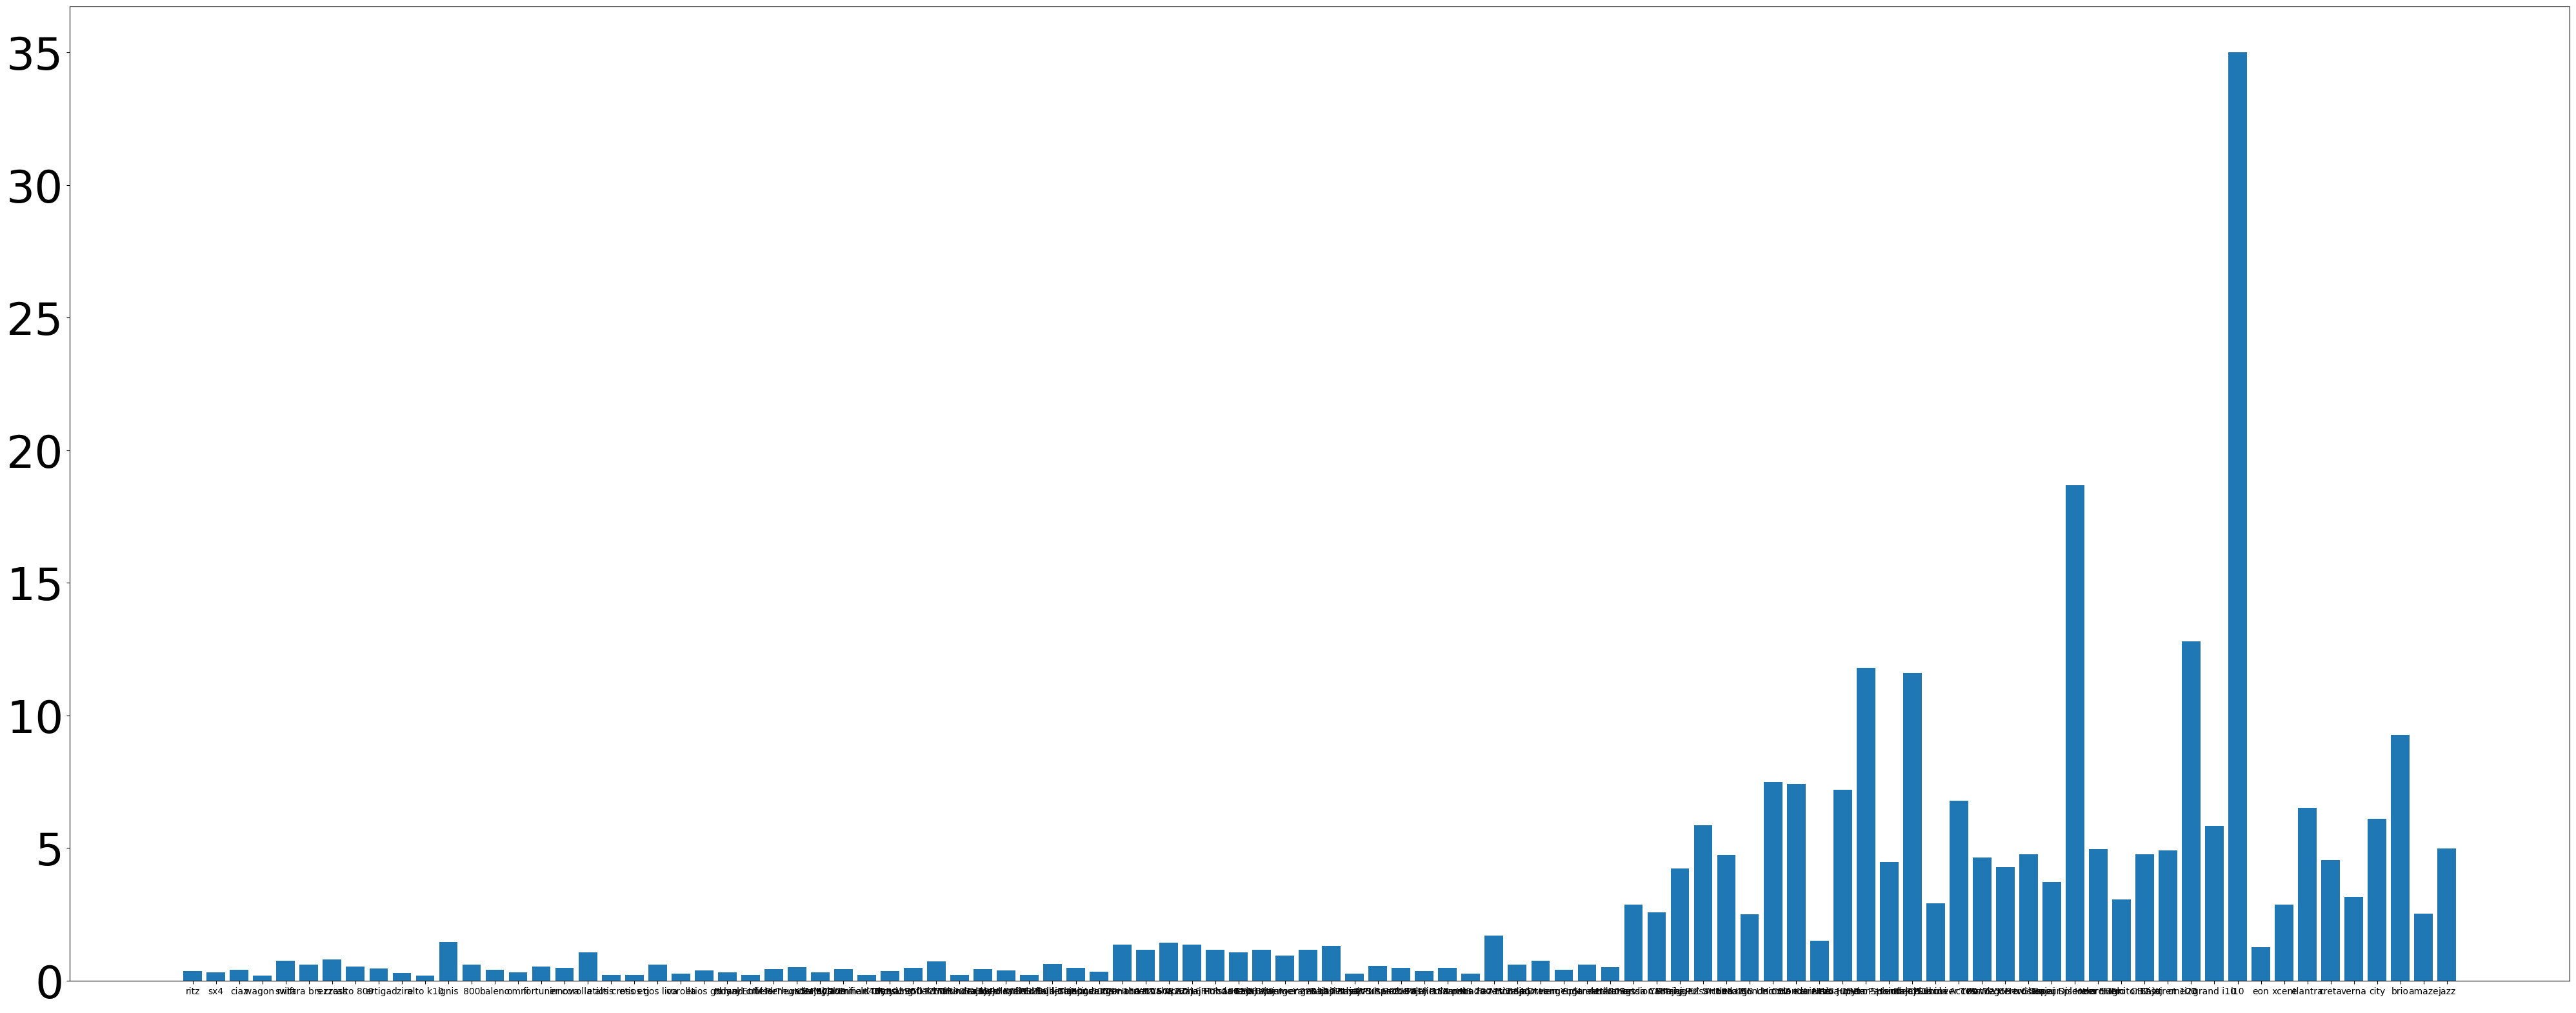

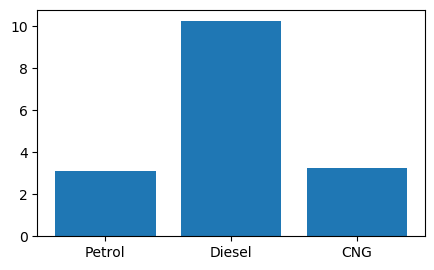

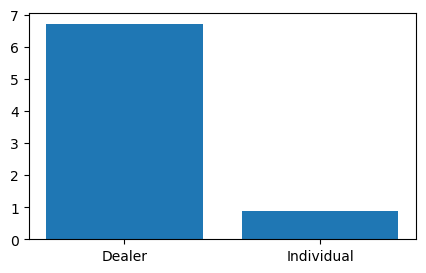

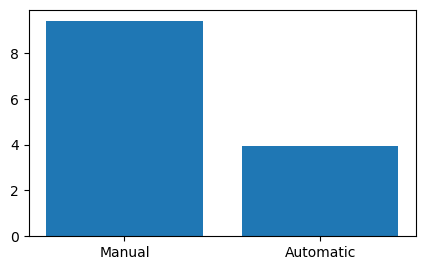

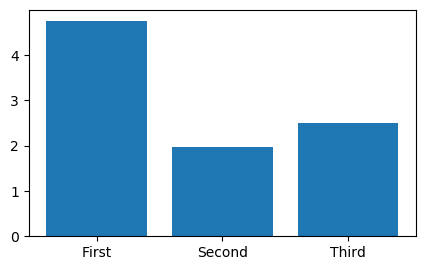

In [7]:
#Checking dependencies: Car_Name,  Fuel_Type, Seller_Type, Transmission, Owner v/s Selling_Price
plt.figure(figsize=(50, 20), dpi=100) 
plt.bar(list(df['Car_Name'].unique()), list(df.groupby('Car_Name').mean()['Selling_Price']))
plt.yticks(fontsize=50)
plt.show()

plt.figure(figsize=(5, 3), dpi=100)
plt.bar(list(df['Fuel_Type'].unique()), list(df.groupby('Fuel_Type').mean()['Selling_Price']))
plt.show()

plt.figure(figsize=(5, 3), dpi=100)
plt.bar(list(df['Seller_Type'].unique()), list(df.groupby('Seller_Type').mean()['Selling_Price']))
plt.show()

plt.figure(figsize=(5, 3), dpi=100)
plt.bar(list(df['Transmission'].unique()), list(df.groupby('Transmission').mean()['Selling_Price']))
plt.show()

plt.figure(figsize=(5, 3), dpi=100)
plt.bar(list(df['Owner'].unique()), list(df.groupby('Owner').mean()['Selling_Price']))
plt.show()

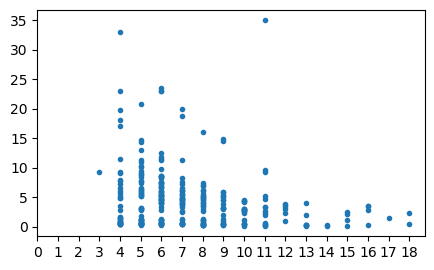

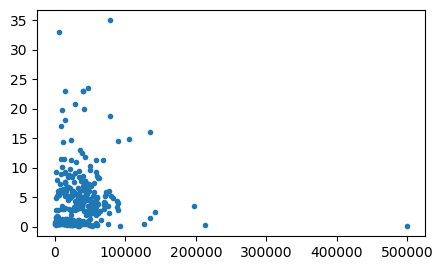

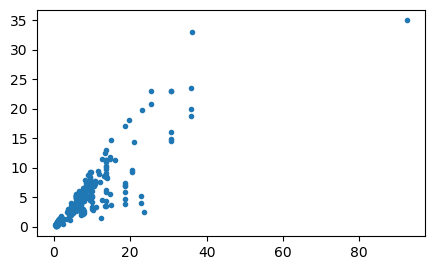

In [8]:
#Checking dependencies: Car_Age/Year, Kms_Driven, Present_Price v/s Selling_Price
plt.figure(figsize=(5, 3), dpi=100)
plt.scatter(df.Car_Age, df.Selling_Price, marker='.')
plt.xticks(range(19))
plt.show()

plt.figure(figsize=(5, 3), dpi=100)
plt.scatter(df.Kms_Driven, df.Selling_Price, marker='.')
plt.show()

plt.figure(figsize=(5, 3), dpi=100) 
plt.scatter(df.Present_Price, df.Selling_Price, marker='.')
plt.show()

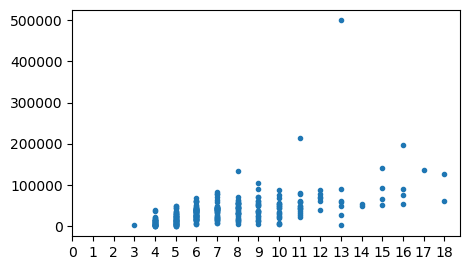

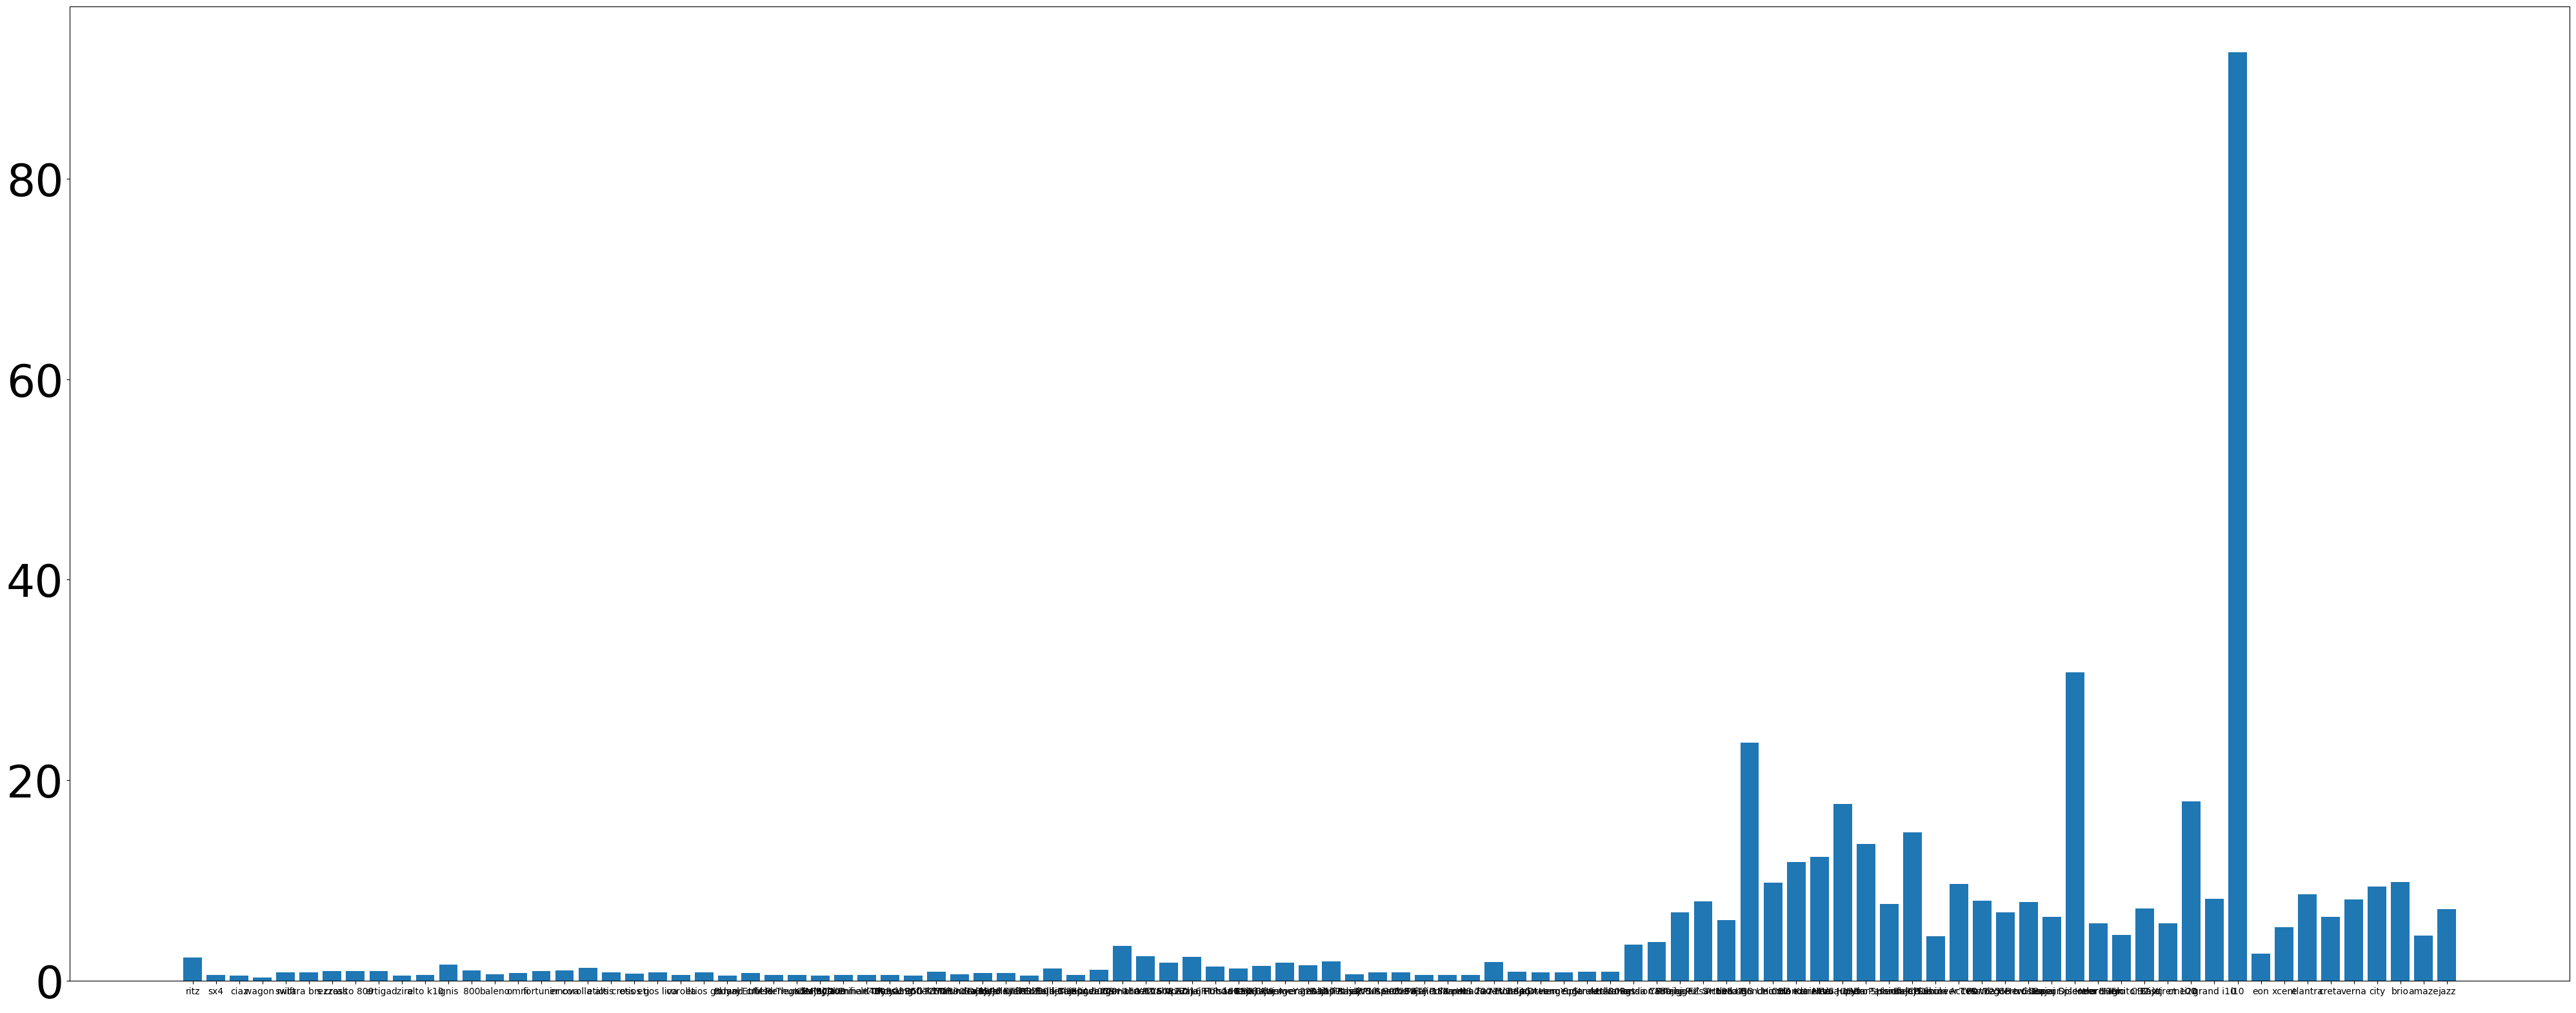

In [9]:
#Checking relationships among independent variables

plt.figure(figsize=(5, 3), dpi=100)
plt.scatter(df.Car_Age, df.Kms_Driven, marker='.')
plt.xticks(range(19))
plt.show()

plt.figure(figsize=(50, 20), dpi=100) 
plt.bar(list(df['Car_Name'].unique()), list(df.groupby('Car_Name').mean()['Present_Price']))
plt.yticks(fontsize=50)
plt.show()

In [10]:
df.drop(columns=['Year'], inplace=True)
df.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission,Owner,Kms_Driven,Car_Age,Present_Price,Selling_Price
0,ritz,Petrol,Dealer,Manual,First,27000,7.0,5.59,3.35
1,sx4,Diesel,Dealer,Manual,First,43000,8.0,9.54,4.75
2,ciaz,Petrol,Dealer,Manual,First,6900,4.0,9.85,7.25
3,wagon r,Petrol,Dealer,Manual,First,5200,10.0,4.15,2.85
4,swift,Diesel,Dealer,Manual,First,42450,7.0,6.87,4.60


In [11]:
X = df.iloc[:, 0:8].values
Y = df.iloc[:, 8].values.reshape(-1, 1)
df.isnull().any()
Y.shape

(301, 1)

In [12]:
print (X[0:5, :]) #Printing just to get an idea of the types of values
X.shape

[['ritz' 'Petrol' 'Dealer' 'Manual' 'First' 27000 7.0 5.59]
 ['sx4' 'Diesel' 'Dealer' 'Manual' 'First' 43000 8.0 9.54]
 ['ciaz' 'Petrol' 'Dealer' 'Manual' 'First' 6900 4.0 9.85]
 ['wagon r' 'Petrol' 'Dealer' 'Manual' 'First' 5200 10.0 4.15]
 ['swift' 'Diesel' 'Dealer' 'Manual' 'First' 42450 7.0 6.87]]


(301, 8)

In [13]:
#Encoding

from sklearn import preprocessing
en1 = preprocessing.LabelEncoder()
en2 = preprocessing.LabelEncoder()
en3 = preprocessing.LabelEncoder()
en4 = preprocessing.LabelEncoder()
en5 = preprocessing.LabelEncoder()

X[:, 0] = en1.fit_transform(X[:, 0]) #Car_Name
X[:, 1] = en2.fit_transform(X[:, 1]) #Fuel_Type
X[:, 2] = en3.fit_transform(X[:, 2]) #Seller_Type
X[:, 3] = en4.fit_transform(X[:, 3]) #Transmission
X[:, 4] = en5.fit_transform(X[:, 4]) #Owner
X[0:5, :]

array([[90, 2, 0, 1, 0, 27000, 7.0, 5.59],
       [93, 1, 0, 1, 0, 43000, 8.0, 9.54],
       [68, 2, 0, 1, 0, 6900, 4.0, 9.85],
       [96, 2, 0, 1, 0, 5200, 10.0, 4.15],
       [92, 1, 0, 1, 0, 42450, 7.0, 6.87]], dtype=object)

In [14]:
#Scaling

from sklearn.preprocessing import StandardScaler
stdscale1 = StandardScaler()
stdscale2 = StandardScaler()
stdscale3 = StandardScaler()
stdscale4 = StandardScaler()
stdscale5 = StandardScaler()
stdscale6 = StandardScaler()
stdscale7 = StandardScaler()
stdscale8 = StandardScaler()

X[:, 0:1] = stdscale1.fit_transform(X[:, 0:1]) #Car_Name
#X[:, 1:2] = stdscale2.fit_transform(X[:, 1:2]) #Fuel_Type
#X[:, 2:3] = stdscale3.fit_transform(X[:, 2:3]) #Seller_Type
#X[:, 3:4] = stdscale4.fit_transform(X[:, 3:4]) #Transmission
#X[:, 4:5] = stdscale5.fit_transform(X[:, 4:5]) #Owner
X[:, 5:6] = stdscale6.fit_transform(X[:, 5:6]) #Kms_Driven
#X[:, 6:7] = stdscale7.fit_transform(X[:, 6:7]) #Car_Age (decided not to scale)
#X[:, 7:8] = stdscale8.fit_transform(X[:, 7:8]) #Present_Price

X[0:5, :]

array([[1.0743234059205309, 2, 0, 1, 0, -0.2562244610375879, 7.0, 5.59],
       [1.1918275284430888, 1, 0, 1, 0, 0.1559105027720208, 8.0, 9.54],
       [0.2126265074217718, 2, 0, 1, 0, -0.7739690093234088, 4.0, 9.85],
       [1.309331650965647, 2, 0, 1, 0, -0.8177583492281797, 10.0, 4.15],
       [1.1526594876022362, 1, 0, 1, 0, 0.14174336339106547, 7.0, 6.87]],
      dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print (X_train)
print (Y_train)
print (X_test)
print (Y_test)

[[0.5651388749894459 1 0 ... 1.1862479122960425 7.0 8.93]
 [0.48680279330774057 2 0 ... -0.3409954714061768 9.0 4.43]
 [0.7218110383528566 1 0 ... -0.7971516010376993 4.0 36.23]
 ...
 [-0.5315662685544292 2 1 ... -0.5910841191328949 6.0 1.9]
 [1.309331650965647 2 0 ... 0.7225960780102327 15.0 4.15]
 [-1.9416157388251258 2 1 ... -0.5988116497043251 7.0 0.64]]
[[ 4.9 ]
 [ 2.  ]
 [33.  ]
 [ 3.75]
 [ 5.65]
 [ 8.55]
 [ 3.8 ]
 [ 0.4 ]
 [ 2.65]
 [ 2.85]
 [ 2.65]
 [ 0.48]
 [ 6.15]
 [ 0.31]
 [ 6.  ]
 [ 0.55]
 [ 9.15]
 [ 0.35]
 [ 2.25]
 [ 0.45]
 [17.  ]
 [ 4.85]
 [ 5.75]
 [ 6.45]
 [ 1.1 ]
 [ 5.35]
 [ 5.5 ]
 [ 0.6 ]
 [ 5.3 ]
 [ 0.65]
 [ 6.  ]
 [ 8.99]
 [ 1.25]
 [ 5.2 ]
 [ 0.2 ]
 [ 0.5 ]
 [ 0.45]
 [ 1.45]
 [ 2.75]
 [ 3.1 ]
 [ 3.25]
 [ 0.42]
 [ 5.4 ]
 [ 0.95]
 [ 0.9 ]
 [ 4.5 ]
 [ 3.  ]
 [ 5.95]
 [ 3.1 ]
 [10.11]
 [ 3.15]
 [ 0.48]
 [ 0.45]
 [ 6.  ]
 [12.5 ]
 [ 0.65]
 [ 7.9 ]
 [ 6.95]
 [ 0.48]
 [ 2.1 ]
 [ 1.2 ]
 [ 4.9 ]
 [ 7.45]
 [ 0.4 ]
 [ 7.25]
 [ 4.5 ]
 [ 3.95]
 [ 1.2 ]
 [ 5.3 ]
 [ 3.1 ]
 [ 4.6 ]


In [16]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

Y_pred = linreg.predict(X_test)

In [17]:
Pred = Y_pred.ravel()
Test = Y_test.ravel()

In [18]:
print (Test)
print (Pred)

[ 8.25  0.5   5.25  9.5  18.    5.5   3.75  0.45  4.5   4.5   2.7   0.72
  5.25  7.5   7.75 19.75  7.4   4.75  0.35  1.7   4.4   5.25  5.11 11.25
  0.2   0.78  0.38  0.65  0.5   3.6   3.25  7.2   0.6   8.75  3.    1.15
  6.6   4.75  0.25  8.25  9.25 19.99  5.5   4.75  5.5  12.9   0.3   1.05
  5.25  6.5   7.5   2.9   4.8  23.5   1.2   1.1   0.65  2.55  4.15  1.35
  3.51]
[ 7.15272097e+00 -4.64102134e-01  4.29643956e+00  8.69044625e+00
  1.41405041e+01  4.93627830e+00  3.52313901e+00  1.45457040e+00
  5.34559637e+00  4.64160475e+00  2.24542462e+00  1.65393425e+00
  5.11373134e+00  7.62348826e+00  8.27865300e+00  1.41683143e+01
  7.36954263e+00  4.28045911e+00 -4.86703451e-01  2.36456091e+00
  4.97309431e+00  3.95280852e+00  6.44657855e+00  8.15513613e+00
 -1.94449800e+00  1.91282135e+00 -8.35158071e-01  8.04949863e-01
  5.96205569e-03  7.15560648e+00  3.20933494e+00  7.07961876e+00
  7.34485187e-01  7.58903308e+00  3.55615145e+00  1.79768166e+00
  5.60612446e+00  6.61614522e+00 -2.611575

In [19]:
error = []
for i in range(len(Pred)):
    error.append(abs(Test[i]-Pred[i]))
print (error)

[1.0972790302851312, 0.9641021337267244, 0.9535604445977244, 0.8095537464181266, 3.859495925123806, 0.5637216950459107, 0.22686098705061397, 1.0045703961155852, 0.8455963711175727, 0.1416047495216315, 0.4545753843746949, 0.9339342503162749, 0.13626866309939878, 0.12348825933628405, 0.5286530044405708, 5.58168565692324, 0.030457373467083215, 0.4695408872130562, 0.8367034511708823, 0.6645609081332469, 0.5730943107336675, 1.2971914837917389, 1.3365785525576301, 3.0948638682344125, 2.1444979970692257, 1.132821353838086, 1.2151580711750496, 0.15494986346340356, 0.494037944314238, 3.5556064787155663, 0.04066505930975417, 0.12038123797619171, 0.13448518684554112, 1.1609669205900817, 0.5561514456795607, 0.6476816640015461, 0.9938755436049362, 1.8661452205517408, 2.86157504585338, 0.5301929935434639, 0.3892073754388772, 0.12817301242831292, 1.0896408048629427, 0.7706670256260271, 0.7906641064924926, 3.3532263841964767, 0.19275116771617212, 0.6227628105771472, 0.06786256952303305, 0.470017987580

In [20]:
total = 0

for i in error:
    total += i
print (total)               #Net error
print (len(error))          #Number of elements in Y_test and Y_pred
print (total/len(error))    #Average (absolute) error per value-prediction pair

60.184596538586256
61
0.9866327301407583


In [21]:
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error

print (explained_variance_score(Y_test, Y_pred))
print (max_error(Y_test, Y_pred))
print (mean_absolute_error(Y_test, Y_pred))    #Almost the same as what I calculated above
print (mean_squared_error(Y_test, Y_pred))
print (median_absolute_error(Y_test, Y_pred))

#Unable to import mean_absolute_percentage_error and min_error due to older version of scikit-learn

0.9191028627991606
5.58168565692324
0.9866327301407578
2.166952361510897
0.6421052337410593


In [22]:
#Calculating total percentage accuracy
avg = 0

for i in range(len(error)):
    #avg += 100 - ( ( (abs(Test[i]-Pred[i])) / Test[i]) * 100 )
    if Pred[i]<Test[i]:
        avg += Pred[i]/Test[i]*100
    else:
        avg += (Test[i]-error[i])/Test[i]*100
print (avg/len(error))    #Tried many ways, but always gave ~24.1% as the accuracy (even when I tried scaling every feature)

24.089005716511334


In [23]:
#No r2 scores, use %age error